In [2]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [17]:
data = pd.read_csv("xclare.csv", header = None)

data.columns = ["V1", "V2"]

data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


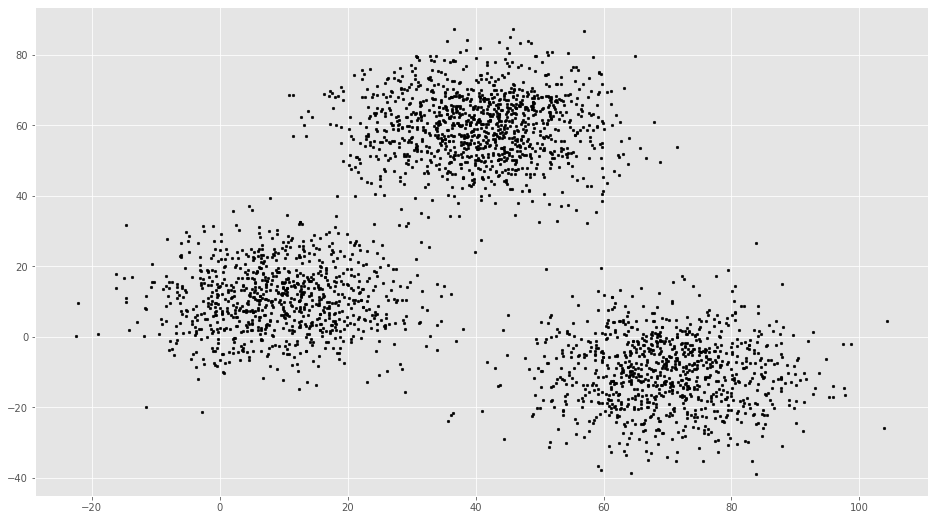

In [18]:
f1 = data['V1'].values
f2 = data['V2'].values

X = np.array(list(zip(f1, f2)))

plt.scatter(f1, f2, c = 'black', s = 7)

In [19]:
def dist(a, b, ax = 1):
    return np.linalg.norm(a - b, axis = ax)

In [20]:
k = 3

C_X = np.random.randint(0, np.max(x) - 20, size = k)
C_y = np.random.randint(0, np.max(x) - 20, size = k)
C = np.array(list(zip(C_x, C_y)), dtype = np.float32)

print(C)

[[21. 68.]
 [38. 63.]
 [16. 35.]]


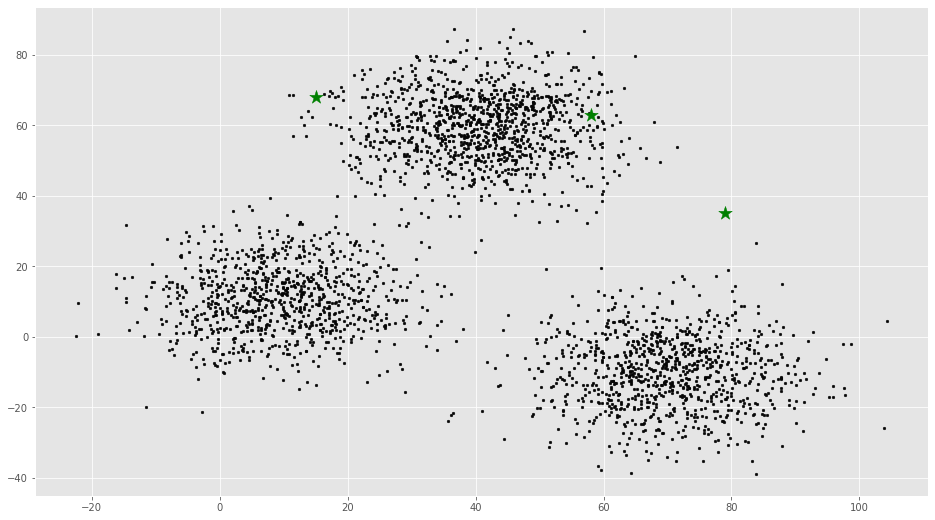

In [21]:
plt.scatter(f1, f2, c = "#050505", s = 7)
plt.scatter(C_X, C_y, marker = "*", s = 200, c = "g")

In [22]:
C_old = np.zeros(C.shape)

clusters = np.zeros(len(x))

error = dist(C, C_old, None)

while error != 0:
    for i in range(len(x)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        
    C_old = deepcopy(C)
    
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis = 0)
    error = dist(C, C_old, None)

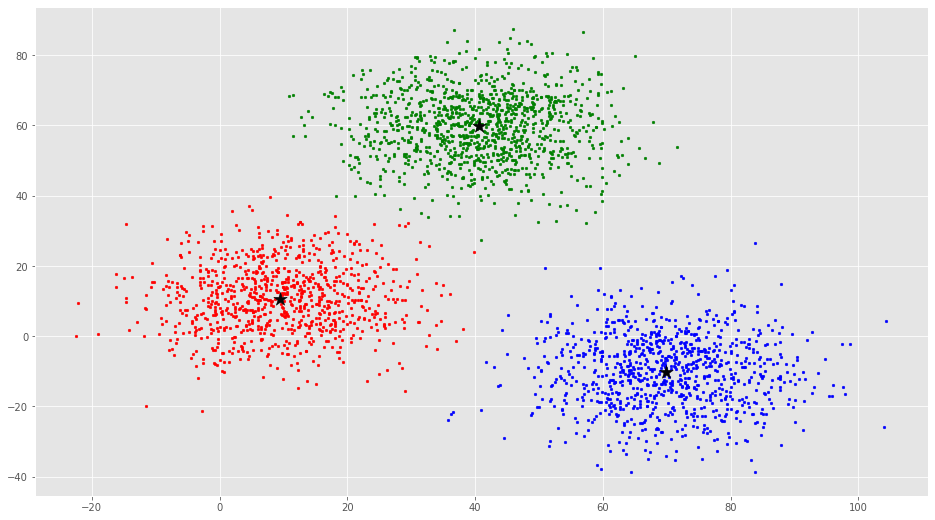

In [24]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']

fig, ax = plt.subplots()

for i in range(k):
    points = np.array([X[j] for j in range(len(x)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s = 7, c = colors[i])

ax.scatter(C[:, 0], C[:, 1], marker = "*", s = 200, c = "#050505")

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = pd.DataFrame(kmeans.cluster_centers_)

print(centroids)

           0          1
0   9.478046  10.686052
1  69.924184 -10.119641
2  40.683628  59.715893


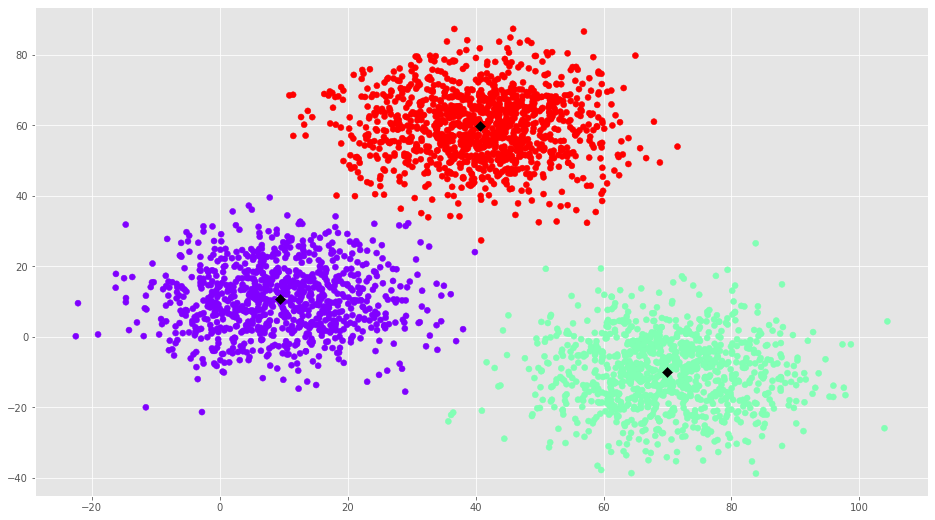

In [52]:
centroids.columns = ["V1", "V2"]

center_x = centroids["V1"]
center_y = centroids["V2"]

plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_, cmap = "rainbow")
plt.scatter(center_x, center_y, s = 50, marker = 'D', c = 'black')
# ax.scatter(center_x, center_y, marker = "D", s = 200, c = "#050505")
plt.show()